Import Dependencies

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Generate data

In [2]:
T = 30
T_start = 15
T_end = 20
S_min = 25
S_max = 35
L = 3.7

In [46]:
X = cp.Variable((T,1))
Y = cp.Variable((T,1))
constraints = [np.zeros([T,1]) <= Y, 
               L*np.ones([T,1]) >= Y,
               Y[0] == 0,
               X[0] == 0,
               Y[:T_start+1] == 0,
               Y[T_end:] ==1, 
               ]
T1 = []
for i in range(T_start+1):
  T1 += [i]
for i in range(T_end, T-1):
  T1 += [i]
q = np.array([[1,0]])
q_2 = np.array([[0,1]])
P = X@q + Y@q_2

constraints = constraints + [(X[i+1] - X[i]) >= 0 for i in range(T-1)]
constraints = constraints + [cp.norm(P[i+1]-P[i]) <= S_max for i in range(T-1)]
constraints = constraints + [X[i+1]-X[i] >= S_min for i in T1]



In [ ]:
constraints

[Inequality(Constant(CONSTANT, ZERO, (31, 1))),
 Inequality(Variable((31, 1))),
 Equality(Expression(AFFINE, UNKNOWN, (1,)), Constant(CONSTANT, ZERO, ())),
 Equality(Expression(AFFINE, UNKNOWN, (1,)), Constant(CONSTANT, ZERO, ())),
 Equality(Expression(AFFINE, UNKNOWN, (15, 1)), Constant(CONSTANT, ZERO, ())),
 Equality(Expression(AFFINE, UNKNOWN, (11, 1)), Constant(CONSTANT, NONNEGATIVE, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 

In [48]:
objective = cp.Minimize(cp.sum(cp.vstack([cp.norm(P[i+1]+P[i-1]-2*P[i]) for i in range(1,T-1)])))

In [49]:
problem = cp.Problem(objective, constraints)
result = problem.solve()
result

0.40000000000254293

<function matplotlib.pyplot.show(close=None, block=None)>

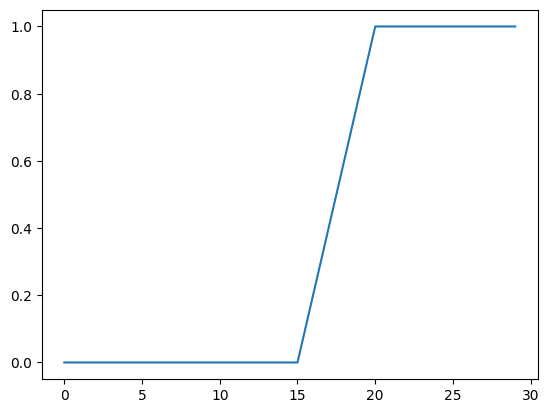

In [51]:
plt.plot(np.arange(T),Y.value)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

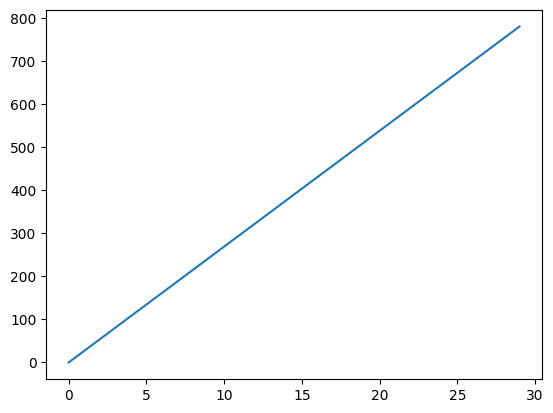

In [53]:
plt.plot(np.arange(T),X.value)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

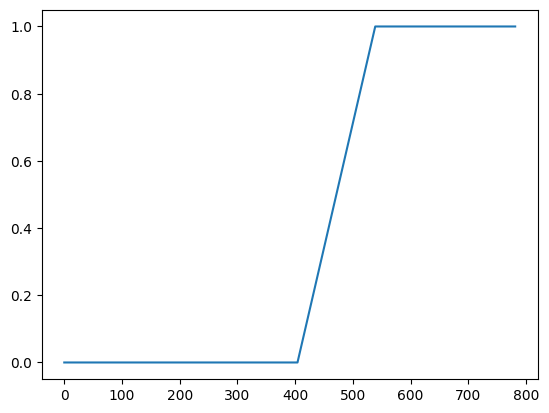

In [54]:
plt.plot(X.value,Y.value)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

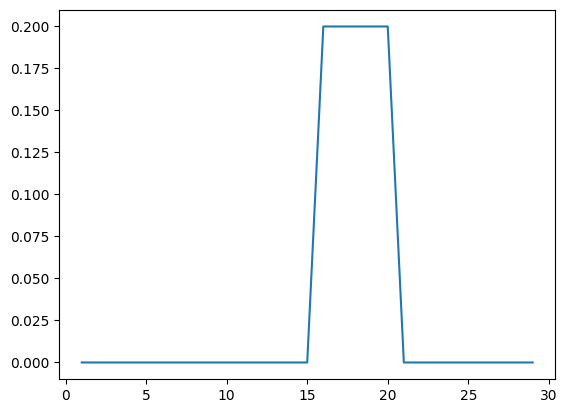

In [57]:
plt.plot(np.arange(1,T),np.ediff1d(Y.value))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

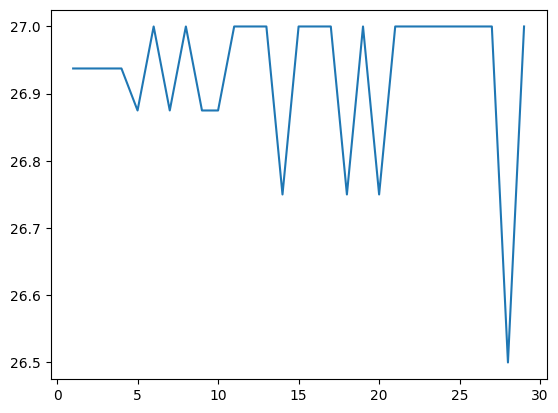

In [59]:
plt.plot(np.arange(1,T),np.ediff1d(X.value.astype('float16')))
plt.show